# HW 2
Xuecheng Zhang(915942842)

group study:Yuhong Fang, Zhongrui Wang, Yiqi Ren, Xiaopeng Lan

# Question 1
### Part a

A generative model learns the joint probability distribution p(x,y) while a discriminative model learns the conditional probability distribution p(y|x) “probability of y given x”. SO it is a discriminative approach.

### Part b
Find the $\beta$ of the MLE:
$$p(Y=k|X=x)=\frac{(\beta X)^k}{k!}e^{-\beta X}$$
next$$L(\beta)=\prod_{i=1}^{n}P_{(y_i|x_i)}P_{(x_i)}$$
so$$l(\beta)=lnL(\beta)=\sum_{i=1}^{n}ln[P_\beta(y_i|x_i)]+\sum_{i=1}^{n}P_\beta(x_i)=nln(\beta)+nln(t)-\beta t-ln(n!)$$ $$\text{where }n=\sum_{k=0}^{n}y_k,  t = \sum_{i=0}^{n}x_i$$
$$\frac{d}{d\beta}[nln(\beta)+nln(t)-\beta t-ln(n!)]=0$$
$$\frac{n}{\beta}-t=0\rightarrow \beta=\frac{n}{t}$$
Given n training samples $(x_1,y_1),...,(x_n,y_n)$, the parameter $\beta=\frac{n}{t}$ via MLE.


### part c
Given a new sample x, since we already have the parameter $\beta$ so we put the new sample x in $$p(Y=k|X=x)=\frac{(\frac{n}{t} X)^k}{k!}e^{-\frac{n}{t} X}$$

# Question 2
### part a

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot
from sklearn import svm


The mean of test error is LDA    49.62
LR     48.43
dtype: float64
The variance of test error is LDA    49.62
LR     48.43
dtype: float64


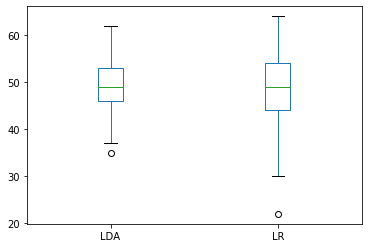

In [4]:
np.random.RandomState(1) # Set the random seed
def generata_data(n,p):
    n1=np.random.binomial(n,0.5)
    n2=100-n1
    x1=np.random.standard_t(1,n1)+p
    x2=np.random.standard_t(1,n2)
    y1=np.repeat(1,n1)
    y2=np.repeat(-1,n2)
    x=np.concatenate((x1,x2))# put x1 and x2 in same x
    y=np.concatenate((y1,y2))# put y1 and y2 in same y
    x=x.reshape(-1,1)#reshape x from 2D to 1D
    return x,y
err1=[]#define an empty list for LDA
err2=[]#define an empty list for logistic regression
lr = skl_lm.LogisticRegression(solver='newton-cg')
lda = LinearDiscriminantAnalysis(solver='svd')
for i in range(100):
    X_train,Y_train = generata_data(100,1)
    X_test,Y_test = generata_data(100,1)
    #LDA
    lda.fit(X_train,Y_train)#use training data to fit the lda model
    test_error1=sum(lda.predict(X_test)!=Y_test)#get the test error
    err1.append(test_error1)#put the test error in err1 list
    #logistic regression
    lr.fit(X_train,Y_train)#use the training dara to fit the logsitic regression model
    test_error2=sum(lr.predict(X_test)!=Y_test)#get the test error
    err2.append(test_error2)#put the test error in err2 list
df= {'LDA':err1, 'LR':err2}
df = pd.DataFrame(data=df)#save them in data frame
#find the mean and variance
mean = df.mean()
var = df.var()
print("The mean of test error is",mean)
print("The variance of test error is",mean)
box_plot = df.plot.box()


### part b

The mean of test error is LDA    46.42
LR     44.18
dtype: float64
The variance of test error is LDA    46.42
LR     44.18
dtype: float64


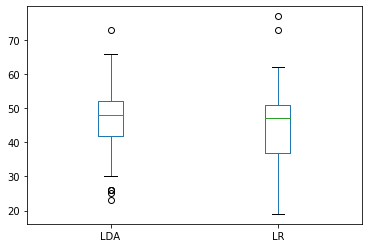

In [5]:
np.random.RandomState(1) # Set the random seed
def generata_data(n,p):
    n1=np.random.binomial(n,0.5)
    n2=100-n1
    x1=np.random.standard_t(1,n1)+p
    x2=np.random.standard_t(1,n2)
    y1=np.repeat(1,n1)
    y2=np.repeat(-1,n2)
    x=np.concatenate((x1,x2))# put x1 and x2 in same x
    y=np.concatenate((y1,y2))# put y1 and y2 in same y
    x=x.reshape(-1,1)#reshape x from 2D to 1D
    return x,y
err1=[]#define an empty list for LDA
err2=[]#define an empty list for logistic regression
lr = skl_lm.LogisticRegression(solver='newton-cg')
lda = LinearDiscriminantAnalysis(solver='svd')
for i in range(100):
    X_train,Y_train = generata_data(100,2)
    X_test,Y_test = generata_data(100,2)
    #LDA
    lda.fit(X_train,Y_train)#use training data to fit the lda model
    test_error1=sum(lda.predict(X_test)!=Y_test)#get the test error
    err1.append(test_error1)#put the test error in err1 list
    #logistic regression
    lr.fit(X_train,Y_train)#use the training dara to fit the logsitic regression model
    test_error2=sum(lr.predict(X_test)!=Y_test)#get the test error
    err2.append(test_error2)#put the test error in err2 list
df= {'LDA':err1, 'LR':err2}
df = pd.DataFrame(data=df)#save them in data frame
#find the mean and variance
mean = df.mean()
var = df.var()
print("The mean of test error is",mean)
print("The variance of test error is",mean)
box_plot = df.plot.box()

The mean of test error is LDA    44.37
LR     37.28
dtype: float64
The variance of test error is LDA    44.37
LR     37.28
dtype: float64


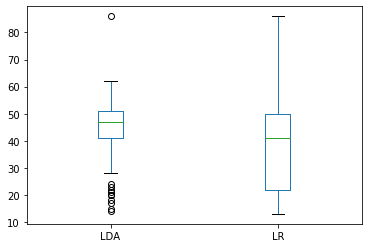

In [6]:
np.random.RandomState(1) # Set the random seed
def generata_data(n,p):
    n1=np.random.binomial(n,0.5)
    n2=100-n1
    x1=np.random.standard_t(1,n1)+p
    x2=np.random.standard_t(1,n2)
    y1=np.repeat(1,n1)
    y2=np.repeat(-1,n2)
    x=np.concatenate((x1,x2))# put x1 and x2 in same x
    y=np.concatenate((y1,y2))# put y1 and y2 in same y
    x=x.reshape(-1,1)#reshape x from 2D to 1D
    return x,y
err1=[]#define an empty list for LDA
err2=[]#define an empty list for logistic regression
lr = skl_lm.LogisticRegression(solver='newton-cg')
lda = LinearDiscriminantAnalysis(solver='svd')
for i in range(100):
    X_train,Y_train = generata_data(100,3)
    X_test,Y_test = generata_data(100,3)
    #LDA
    lda.fit(X_train,Y_train)#use training data to fit the lda model
    test_error1=sum(lda.predict(X_test)!=Y_test)#get the test error
    err1.append(test_error1)#put the test error in err1 list
    #logistic regression
    lr.fit(X_train,Y_train)#use the training dara to fit the logsitic regression model
    test_error2=sum(lr.predict(X_test)!=Y_test)#get the test error
    err2.append(test_error2)#put the test error in err2 list
df= {'LDA':err1, 'LR':err2}
df = pd.DataFrame(data=df)#save them in data frame
#find the mean and variance
mean = df.mean()
var = df.var()
print("The mean of test error is",mean)
print("The variance of test error is",mean)
box_plot = df.plot.box()

# Question 3
### part a
In this question my code based on stackoverflow and scikittlearn.

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html
https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot
import matplotlib.lines as mlines

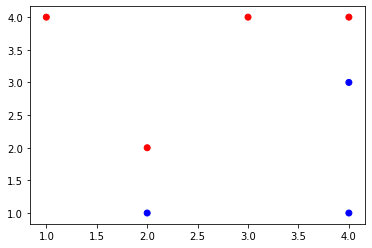

In [8]:
vector_x1 = np.array([3, 2, 4, 1, 2, 4, 4]);
vector_x2 = np.array([4, 2, 4, 4, 1, 3, 1]);
matplotlib.pyplot.scatter(vector_x1,vector_x2,color=["r", "r", "r", "r", "b", "b", "b"])


### part b

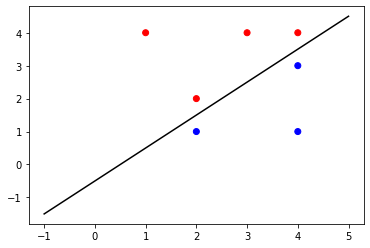

In [11]:
X = np.vstack((vector_x1,vector_x2)).T#add vector_x1 and vector_x2 as column vector
Y = np.array([1]*4 + [0]*3)#"1" is red, and repect 4 times,"0"is blue which repect 3 times
clf = svm.SVC(kernel='linear',C=9999)#since optimal separating hyperplane, so we set Regularization parameter become a big number
clf.fit(X, Y)#fir X and Y in clf model
w = clf.coef_[0]# get the coefficients
a = -w[0] / w[1]# find the slope by negative beta1 divided beta 2
xx = np.linspace(-1, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]#create a relationship
matplotlib.pyplot.scatter(vector_x1,vector_x2,color=["r", "r", "r", "r", "b", "b", "b"])
plt.plot(xx, yy, 'k-')

### part c
The $$\beta_1=-0.61538462, \beta_2=1.07692308,\beta_0=-0.8461538461538456$$
if $-0.8461538461538456-0.61538462X_1+1.07692308X_2>0$ is red, otherwise it will be blue


### part d

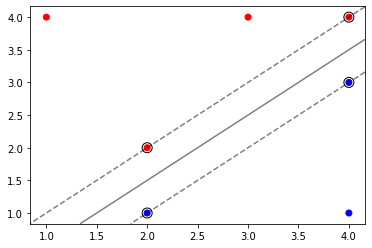

In [12]:
# plot the line, the points, and the nearest vectors to the plane
X = np.vstack((vector_x1,vector_x2)).T#add vector_x1 and vector_x2 as column vector
Y = np.array([1]*4 + [0]*3)#"1" is red, and repect 4 times,"0"is blue which repect 3 times
clf = svm.SVC(kernel='linear',C=9999)#since optimal separating hyperplane, so we set Regularization parameter become a big number
clf.fit(X, Y)#fir X and Y in clf model
w = clf.coef_[0]# get the coefficients
a = -w[0] / w[1]# find the slope by negative beta1 divided beta 2
xx = np.linspace(-1, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]#create a relationship
matplotlib.pyplot.scatter(vector_x1,vector_x2,color=["r", "r", "r", "r", "b", "b", "b"])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()#the decision function of x
ylim = ax.get_ylim()#the decision function of y

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T#add XX.ravel() and YY.ravel()as column vector
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])# plot decision boundary and margins
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()# plot support vectors


### part e
From part d), the plot shows that the support vectors are the points (2,1), (2,2), (4,3) and (4,4).

### part f
Since (4,1),(1,4),(3,4)are not the support vectors, so if we moved those observations, we would not change the maximal margin hyperplane.

### part g

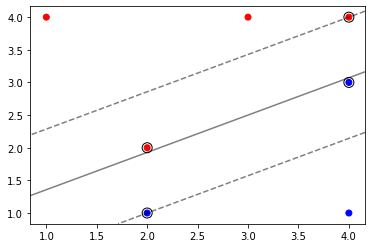

In [13]:
# plot the line, the points, and the nearest vectors to the plane
X = np.vstack((vector_x1,vector_x2)).T#add vector_x1 and vector_x2 as column vector
Y = np.array([1]*4 + [0]*3)#"1" is red, and repect 4 times,"0"is blue which repect 3 times
clf = svm.SVC(kernel='linear')#since not optimal separating hyperplane, so we do not set Regularization parameter 
clf.fit(X, Y)#fir X and Y in clf model
w = clf.coef_[0]# get the coefficients
a = -w[0] / w[1]# find the slope by negative beta1 divided beta 2
xx = np.linspace(-1, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]#create a relationship
matplotlib.pyplot.scatter(vector_x1,vector_x2,color=["r", "r", "r", "r", "b", "b", "b"])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()#the decision function of x
ylim = ax.get_ylim()#the decision function of y

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T#add XX.ravel() and YY.ravel()as column vector
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])# plot decision boundary and margins
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()# plot support vectors

### part h

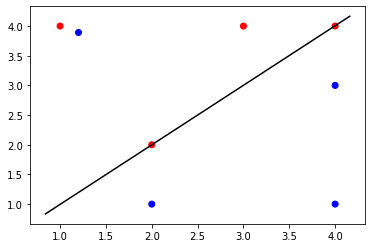

In [53]:
matplotlib.pyplot.scatter(vector_x1,vector_x2,color=["r", "r", "r", "r", "b", "b", "b"])
plt.plot(xx, yy, 'k-')
plt.scatter(1.2,3.9,color="b")#this number should be red, but I set it to be blue

(1.2,3.9) this point should be red, but I set it to be blue, so the two classes are no longer separable by a hyperplane.